## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

Since we want only: 

(group,landing_page) = (treatment, new_page). 

There are two possible 2 case where new_page and treatment don't line up : 

first : (group,landing_page) = (treatment,old_page)

second : (group,landing_page) = (control,new_page)

In [6]:
first_df = len(df.query('group == "treatment" and landing_page == "old_page"'))

In [7]:
second_df = len(df.query('group == "control" and landing_page == "new_page"'))

In [8]:
e = first_df + second_df 
e

3893

f. Do any of the rows have missing values?

In [9]:
missing = df.isnull().sum()
missing

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No, there is no missing value.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In other words, I will be sure data only includes:
(group,landing_page) = (treatment, new_page) and
(group,landing_page) = (control, old_page) as dropping the others.

In [10]:
df2 = df.drop(df.query('group == "treatment" and landing_page != "new_page" | group == "control" and landing_page != "old_page"').index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicated_user = df2[df2['user_id'].duplicated()]
duplicated_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop([2893])

Now, checking if it is still duplicated or the code works:

In [16]:
df2[df2['user_id'].duplicated()].any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
p_control = df2.query('group == "control"').converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
p_treatment = df2.query('group == "treatment"').converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

I will calcultate probability of an individual received the new page as `new page count / total pages count`.

In [20]:
newpage_count = df.query('landing_page == "new_page"')['user_id'].count()
newpage_count

147239

In [21]:
oldpage_count = df.query('landing_page == "old_page"')['user_id'].count()
oldpage_count

147239

In [22]:
total_page = newpage_count + oldpage_count
total_page

294478

In [23]:
p_newpage = newpage_count / total_page
p_newpage

0.5

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [24]:
obs_diff = p_treatment - p_control
print('Observed difference is: {}'.format(obs_diff))

Observed difference is: -0.0015782389853555567


* For now, it cannot be said that the new treatment page leads to more conversions, I haven't got any sufficient evidence to support the statement. 

* I found that p_control = 0.1203 = %12 and p_treatment = 0.1188 = %11. In other words, treatment groups' and control groups' converted rates are too close to each other to have an idea. There is only 0.001 difference between them as can be seen from obs_diff above. 

* The probability of received new page or old page comes out 50-50%.

* To decide the page treatment, I need to test null hypothesis and try to have more evidence.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**We want to assume that the old page is better, unless the new page proves to be definitely better at a Type error 5%.**

**H_0: 𝑝𝑛𝑒𝑤  -   𝑝𝑜𝑙𝑑  ≤ 0**

**H_1: 𝑝𝑛𝑒𝑤  -   𝑝𝑜𝑙𝑑  > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>


**Assuming $p_{new}$ = $p_{old}$**

**Sample size=ab_data sample size**

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [27]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.12124423645998211

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11945702603356416

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
difference = new_page_converted.mean() - old_page_converted.mean()
print('Simulated difference is: {}'.format(difference))

Simulated difference is: 0.001787210426417954


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
diffs = []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace = True)
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [33]:
p_diffs = np.array(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  18.,  119.,  519., 1267., 2423., 2639., 1881.,  873.,  221.,
          40.]),
 array([-0.00440722, -0.00356615, -0.00272509, -0.00188402, -0.00104296,
        -0.00020189,  0.00063917,  0.00148024,  0.0023213 ,  0.00316237,
         0.00400343]),
 <BarContainer object of 10 artists>)

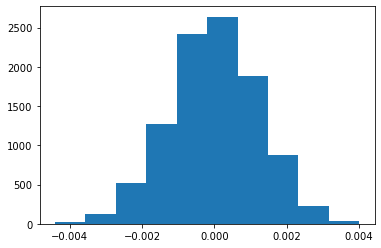

In [34]:
plt.hist(p_diffs) #looks pretty normal

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
#Creating distribution under the null hypothesis:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

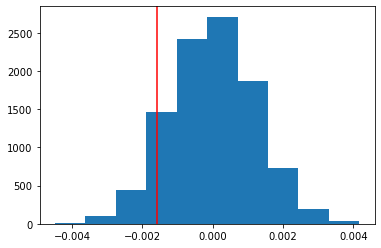

In [36]:
#red line shows the observed difference (obs_diff = p_treatment - p_control)
plt.hist(null_vals)
plt.axvline(x=obs_diff, c='red')

In [37]:
#Computing the p-value:
(null_vals > obs_diff).mean()

0.9065

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Our statistic look like it came from this null distribution, p-value = 0.91 > 0.05. So that, we do not reject the Null Hypothesis.**

**Looks like the difference we observed is not significant, there is no evidence the new page will be more successful than the old page. According to the result, there is no need to change the old page to the new page. The distribution is normal, the shape is bell. With this information, we can test the Z-test using mean and variance.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

I want to add some source to understand  z-test better. 

* count : the number of successes in nobs trials. If this is array_like, then the assumption is that this represents the number of successes for each independent sample

* nobs : the number of trials or observations, with the same length as count.

* value : This is the value of the null hypothesis equal to the proportion in the case of a one sample test. 

In the case of a two-sample test, the null hypothesis is that prop[0] - prop[1] = value, where prop is the proportion in the two samples. 

If not provided value = 0 and the null is prop[0] = prop[1]

* alternative : string in [‘two-sided’, ‘smaller’, ‘larger’]

The alternative hypothesis can be either two-sided or one of the one- sided tests, smaller means that the alternative hypothesis is prop < value` and larger means ``prop > value, or the corresponding inequality for the two sample test.

* prop_var : False or float in (0, 1)

If prop_var is false, then the variance of the proportion estimate is calculated based on the sample proportion. Alternatively, a proportion can be specified to calculate this variance. Common use case is to use the proportion under the Null hypothesis to specify the variance of the proportion estimate.

Source: https://www.w3cschool.cn/doc_statsmodels/statsmodels-generated-statsmodels-stats-proportion-proportions_ztest.html

H_0: 𝑝𝑛𝑒𝑤 = 𝑝𝑜𝑙𝑑 

H_1: 𝑝𝑛𝑒𝑤 != 𝑝𝑜𝑙𝑑 

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'two-sided')
z_score, p_value

print('Z-score: {}'.format(z_score))
print('P-value of Z-Test: {}'.format(p_value))

Z-score: -1.3109241984234394
P-value of Z-Test: 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score and p-value computations from the test statistic suggest that the conversion rates for the old and new pages are not statistically different from one another and 
to not reject the null hypothesis, 
the z-score means the test statistic is very close to the null mean, and the p-value means that there is statistical significance to affirm the findings previously made and fail to reject the null.**

**The Z-score shows how far from the 𝜇 in units of standard deviation. Do not exactly appears the result about whether accept or reject the H_0 hypothesis.
The P-value shows the probabilty that under the H_0 hypothesis (which is 𝑝𝑛𝑒𝑤 = 𝑝𝑜𝑙𝑑 in this case). It indicates how unlikely the statistic is.**

**The results indicates that: Z-score < Mean
Z-score is -1.31
To calculate the area I need to 1-(z-score) because it is negative on the z-table.
`1- 0.9049`**

In [40]:
1-0.9049

0.09509999999999996

The Z-test also indicates that I do not reject the H_0 hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I want to predict categorical responses, that's why I should use `logistic regression`.**

**It is a regression approach used to predict only 2 possible outcomes. Such as an individual clicked on a website - or not clicked on a website.**

**The predicted response variable is limited to a probability between 0 and 1. In other words, predicts a probability between 0 and 1.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
#dummy variables : a_page(receives treatment=0, receives control=1) , ab_page= opposite of a_page
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('ab_page', axis=1) 
df2.head()

,user_id,timestamp,group,landing_page,converted,a_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
#instantiate logistic regression model
df2['intercept']= 1
logit_mod =sm.Logit(df2['converted'],df2[['intercept', 'a_page']])

In [43]:
#fit the model
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [44]:
#get summary statistics
results.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-02-18 14:57 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
a_page        0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

**About a_page results:**

**p-value=0.189~0.19**
    
**type-1 error = 0.05**
    
**p-value >> type-1 error**
    
**Statistically, it is not significant in predicting the individuals convert or do not.**

In [45]:
#to exponentiate
np.exp(0.015)

1.015113064615719

**coefficient = e^0.015 ~ 1.015**
 
**Individuals are 1.015 times likely convert the page as likely holding all else constant.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value=0.189~0.19**

**It differs because the part2 was Z-Test's p-value, while this one is Logistic Regression's p-value. It was not expected to have same p-value in these ones. The reason is adding an intercept for the logistic regression model. The p-value of 0.19 is more accurate as calculating bias, too.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In some cases, a factor could be really important to affect the result. In such a case, believe that adding the factor into improves the model. I may try to see whether important or not, as calculating the correlation coefficient, then decide to hold or remove it.**

**On the other hand, I may add too many factors and my model would has an over-fitting problem and misleading results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [47]:
df_new.head()

,country,timestamp,group,landing_page,converted,a_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [48]:
# Countries 
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [49]:
# Creating the necessary dummy variables  : UK,US,CA
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new.country)

In [50]:
# Dropping CA
df_new = df_new.drop('CA', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,a_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# Model
model = sm.Logit(df_new.converted, df_new[['intercept', 'UK', 'US']])

In [52]:
#Fitting the model
results_new = model.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:               1.521e-05
Time:                        14:57:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
US             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**p_value @UK : 0.13**

**p_value @US : 0.46**

**p-values >> type-I error**

**The results do not indicate statiscially significancy, I guess that no need to renew the old_page but to be sure I will add new_page and old_page to see whether the model improves and results change.**

In [53]:
# Creating the factor dummy variables : old_page, new_page
df_new[['old_page', 'new_page']] = pd.get_dummies(df_new.landing_page)
df_new.head()

,country,timestamp,group,landing_page,converted,a_page,intercept,UK,US,old_page,new_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,0


In [54]:
# Dropping the new_page
df_new = df_new.drop('new_page', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,a_page,intercept,UK,US,old_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1


In [55]:
model = sm.Logit(df_new.converted,df_new[['intercept','UK','US','old_page']])
results_factor = model.fit()
results_factor.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:               2.323e-05
Time:                        14:57:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
old_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**P-value is still greater than 1, do not indicate significancy. So, cannot say that new_page is necessary. Better to keep the old one.**